In [ ]:
#This script describes the workflow of data visualization used in Fig. 1d-f
###by Haikuo Li @ Humphreys Lab

In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
from matplotlib import rcParams
import matplotlib.font_manager
rcParams['font.sans-serif']=['Arial']
sc.settings.set_figure_params(dpi=100, facecolor='white',fontsize=12)
from matplotlib import rcParams

adata = sc.read('309666cell_anndata.h5ad')

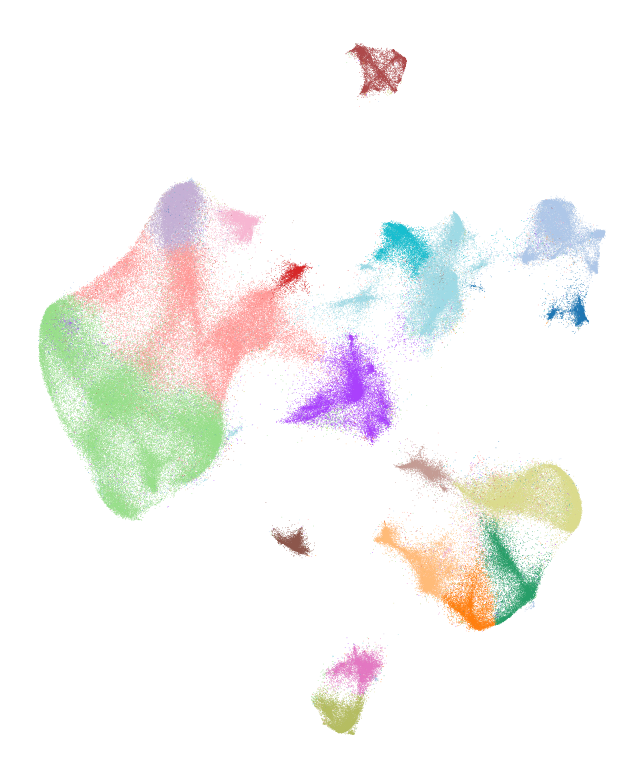

In [3]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,10
sc.pl.umap(adata, color='celltype0421',size=1,frameon=False,title='',legend_loc=False)

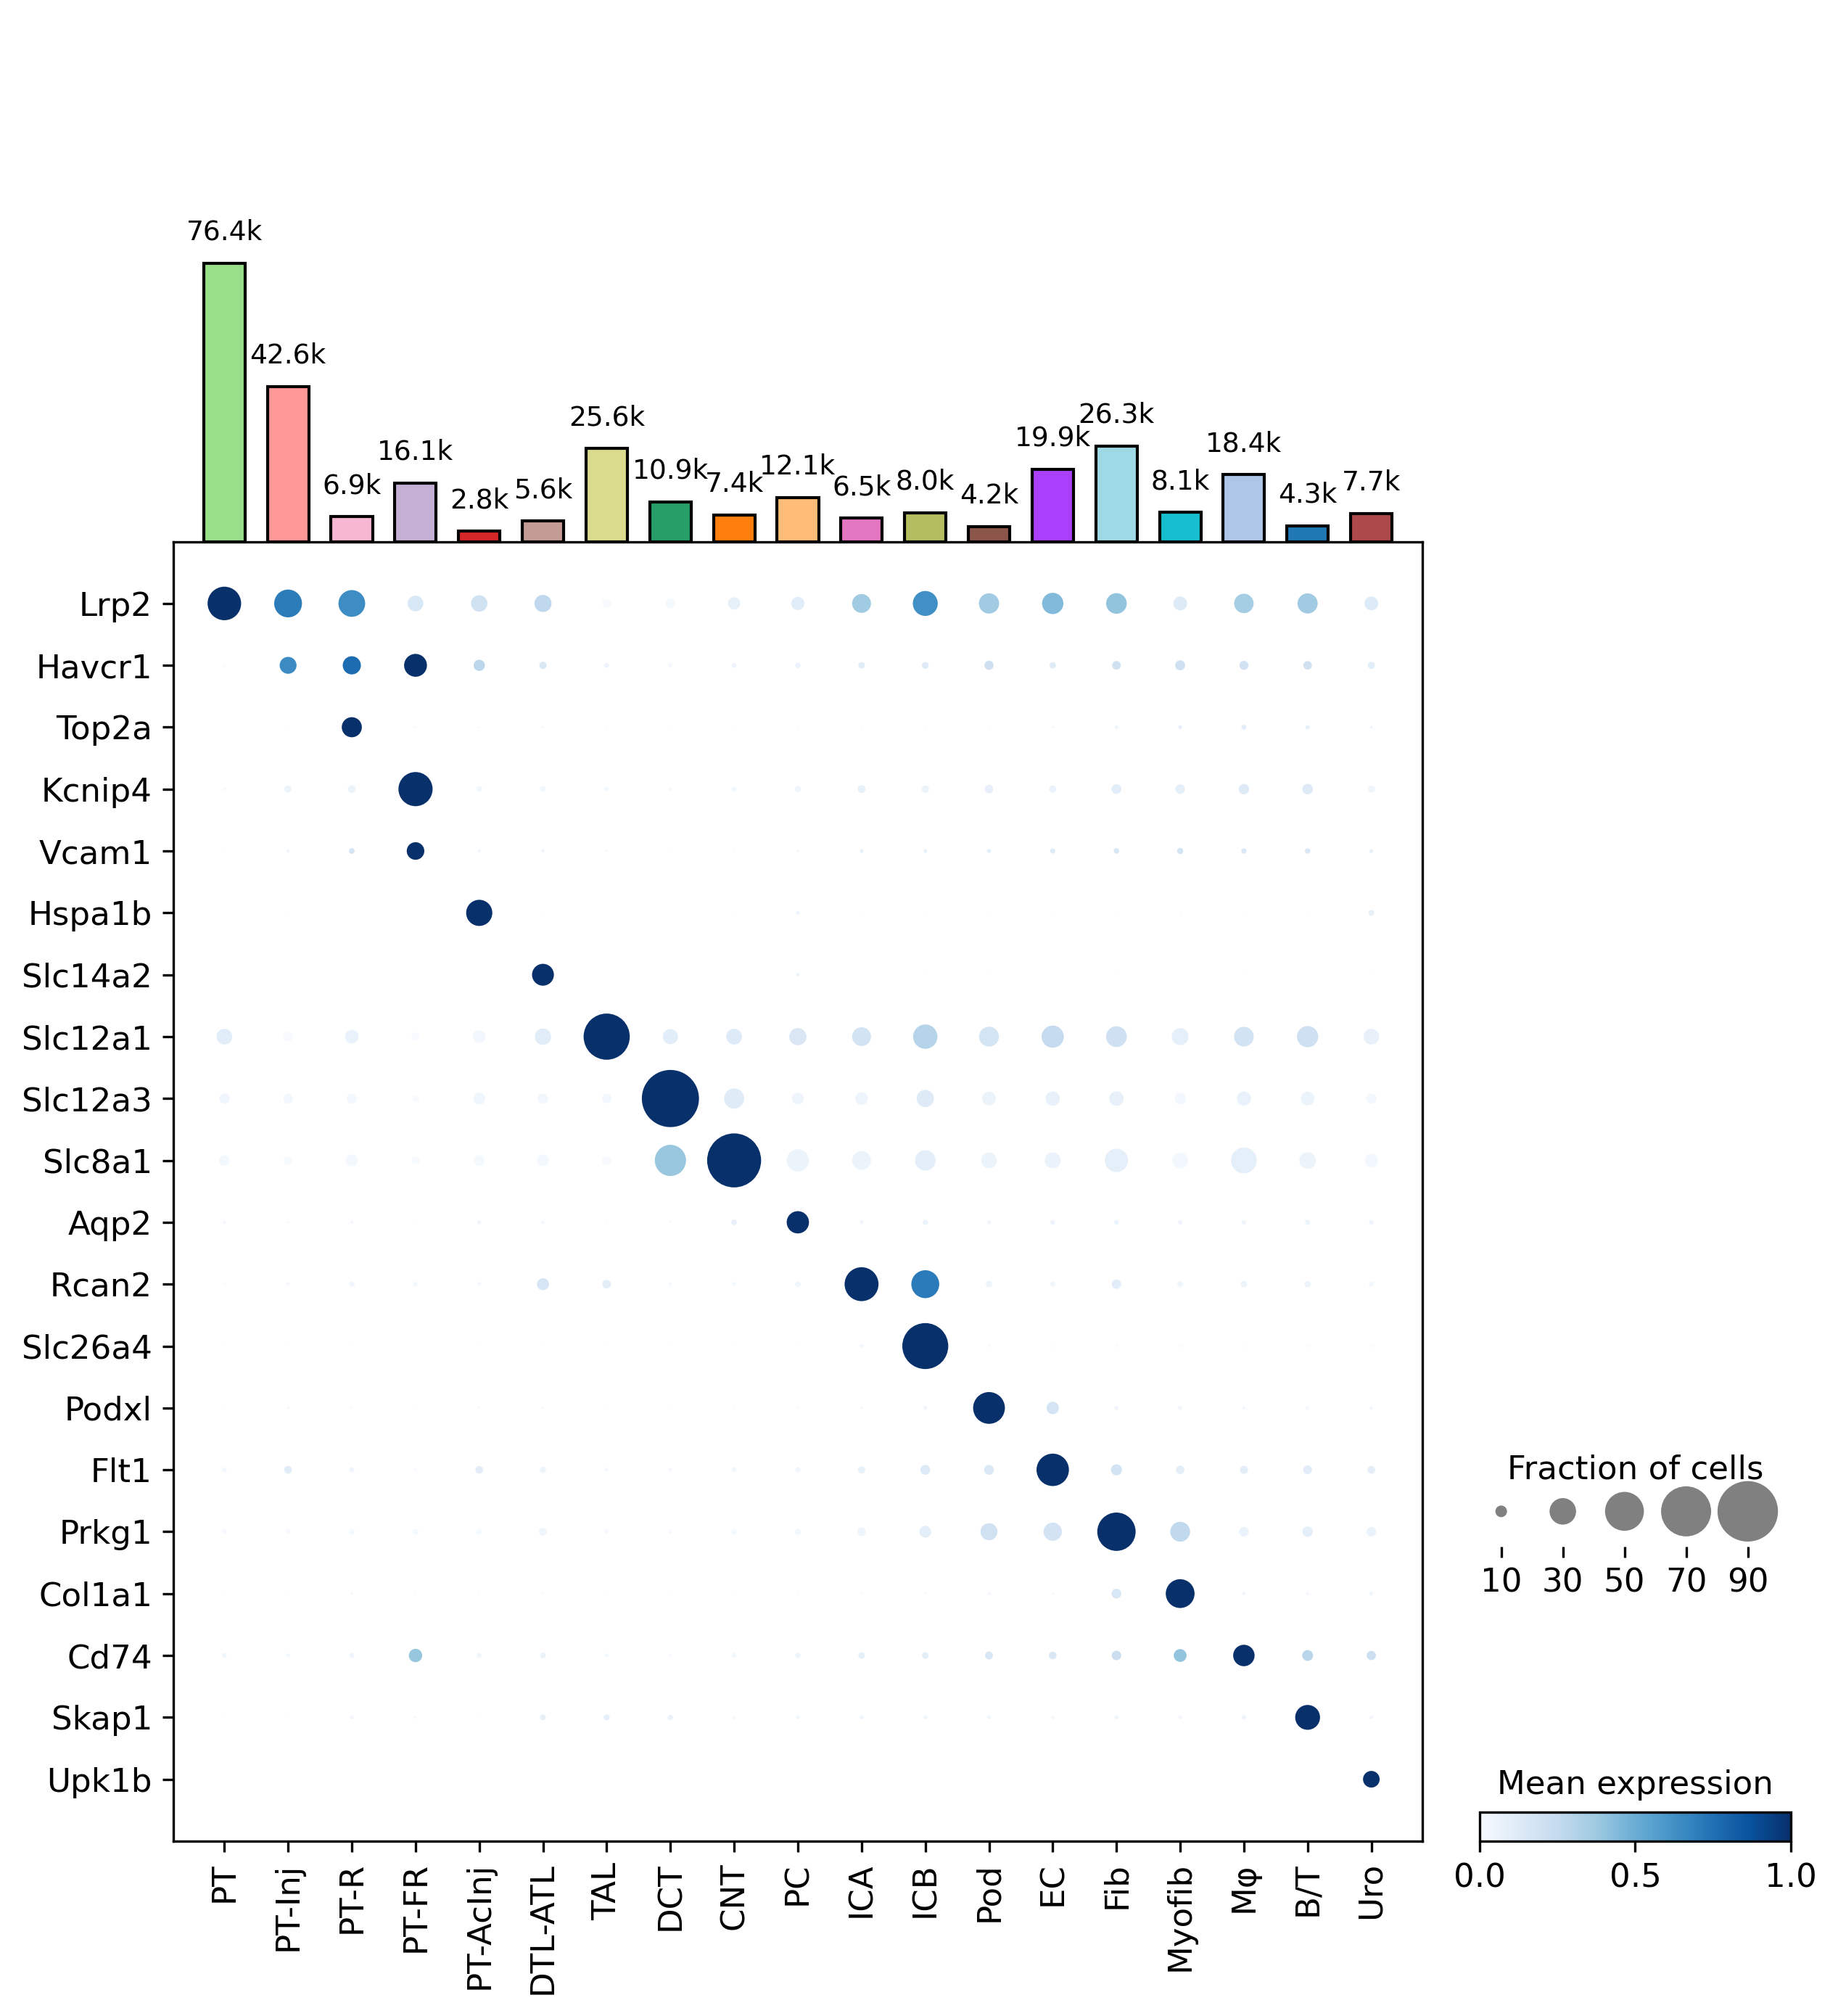

In [15]:
marker_genes=['Lrp2','Havcr1','Top2a','Kcnip4','Vcam1','Hspa1b',
              'Slc14a2','Slc12a1','Slc12a3','Slc8a1','Aqp2','Rcan2','Slc26a4','Podxl',
              'Flt1','Prkg1','Col1a1','Cd74','Skap1','Upk1b']

cell_order=['PT','PT-Inj','PT-R','PT-FR','PT-AcInj','DTL-ATL','TAL','DCT','CNT','PC','ICA','ICB','Pod',
 'EC','Fib','Myofib','Mφ','B/T','Uro']

cell_order1=[]
for i in adata.obs.celltype0421:
    if i not in cell_order1:
        cell_order1.append(i)
        
cell_order1.sort()
celltype0421_colors_dp=[]
for i in cell_order:
    ind=cell_order1.index(i)
    celltype0421_colors_dp.append(adata.uns['celltype0421_colors'][ind])

sc.settings.set_figure_params(dpi=300, facecolor='white',figsize=[18,8],fontsize=13)
sc.pl.DotPlot(adata, marker_genes, groupby='celltype0421',
             categories_order=cell_order,standard_scale='var')\
.add_totals(color=celltype0421_colors_dp,size=3)\
.style(cmap="Blues",largest_dot=400,dot_edge_lw=0)\
.legend(width=2.5,colorbar_title='Mean expression',size_title='Fraction of cells').swap_axes().savefig('figures/f1_dotplot.png')

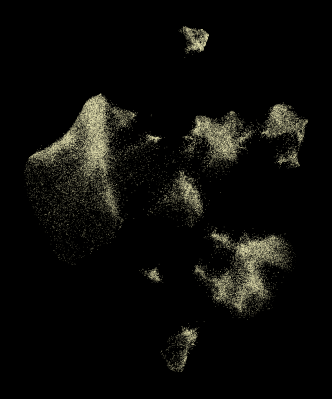

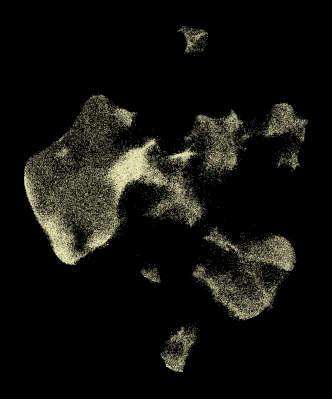

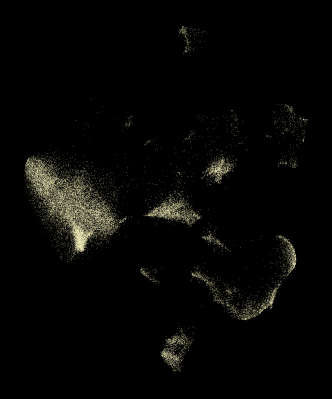

In [33]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 4,5
rcParams['figure.facecolor'] = 'black'

sc.pl.umap(adata, color='sample3_corrected',title="",size=1,alpha=0.6,
           palette=['black','black','#f0ecb9'],frameon=False,legend_loc=False,save='f1_UUO.png')#UUO
sc.pl.umap(adata, color='sample3_corrected',title="",size=1,alpha=0.6,
           palette=['black','#f0ecb9','black'],frameon=False,legend_loc=False,save='f1_IRI.png')#IRI
sc.pl.umap(adata, color='sample3_corrected',title="",size=1,alpha=0.6,
           palette=['#f0ecb9','black','black'],frameon=False,legend_loc=False,save='f1_Health.png')#Healt

In [39]:
sc.settings.set_figure_params(dpi=100, facecolor='white',fontsize=12)
sc.pl.correlation_matrix(adata, 'celltype0421',save='f1_correlation.png',show=False)

[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]